In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot

<ipython-input-1-a6259710cce6>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1gwos9R0BsOyXgcrGHB8XJ-YVejkqs2-P/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('ADANIPORTS.csv') 
 
df1 = pd.read_csv('ADANIPORTS.csv', encoding= 'unicode_escape')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Performing Stock Market Analysis and Time Series Predictions on Adani Ports Stocks**

In [ ]:
print(df1.head())
print(df1.shape)

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [ ]:
print(df1.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [ ]:
df1.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

Eliminating Null Values by filling the NaN columns with mean values. Here null values are found in Trades Column. If we dont eliminate the null values, they will create a bias in the dataset

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1.fillna(df1.mean(), inplace=True)

In [ ]:
df1.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

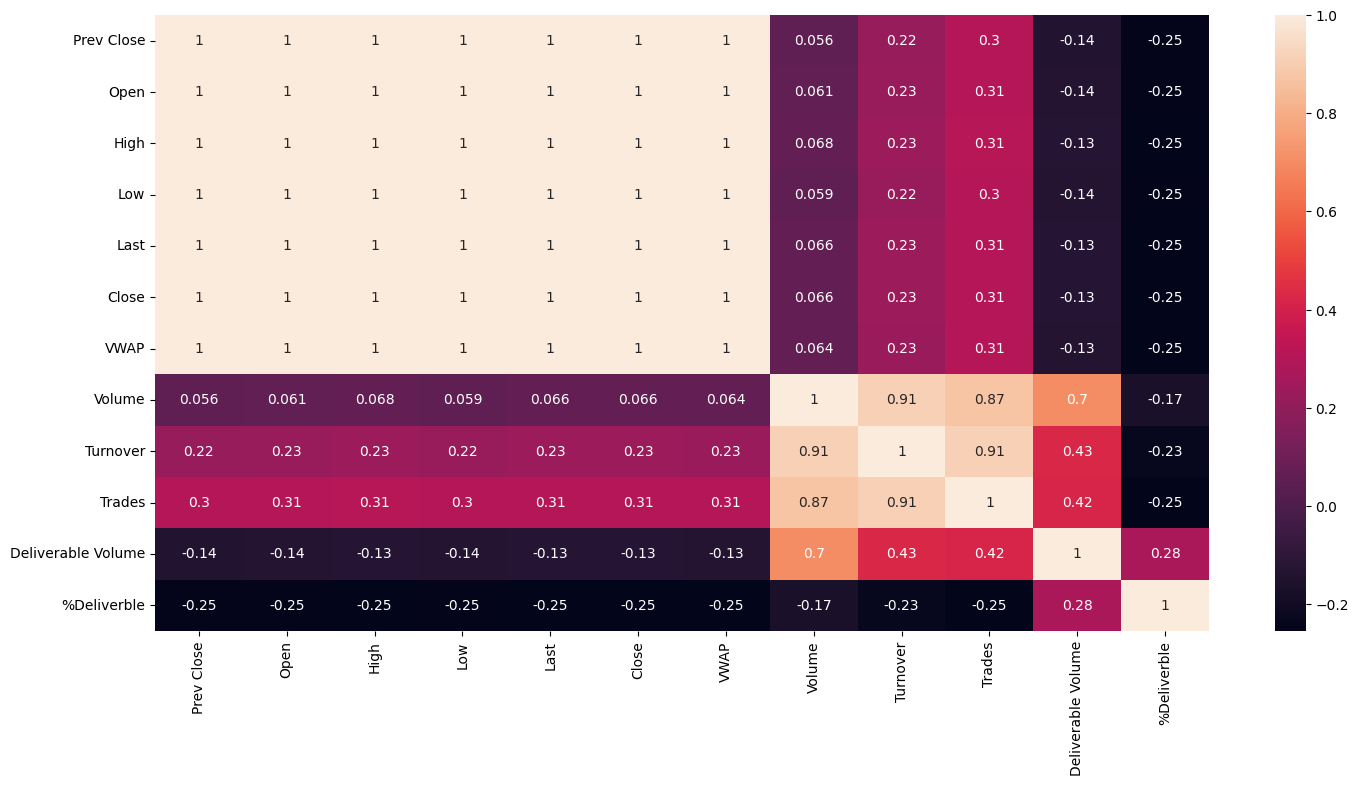

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df1.corr(), annot = True)

All null values are eliminated 

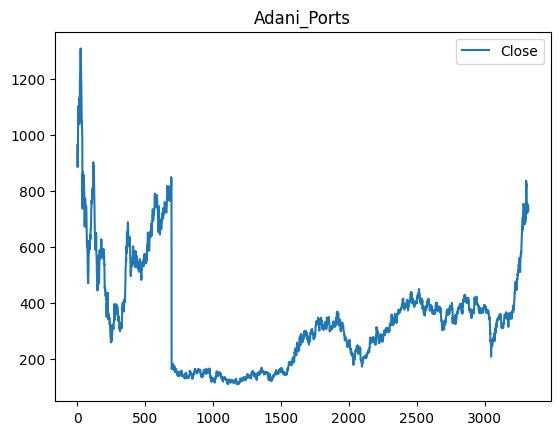

In [ ]:
df1[['Close']].plot()
plt.title("Adani_Ports")
plt.show()

Text(0.5, 1.0, 'ADANI_PORTS Cumulative returns')

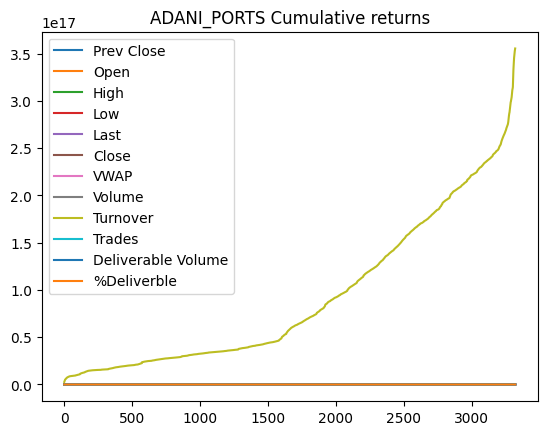

In [ ]:
dr = df1.cumsum()
dr.plot()
plt.title('ADANI_PORTS Cumulative returns')

Text(0.5, 1.0, 'ADANI_PORTS Autocorrelation graph')

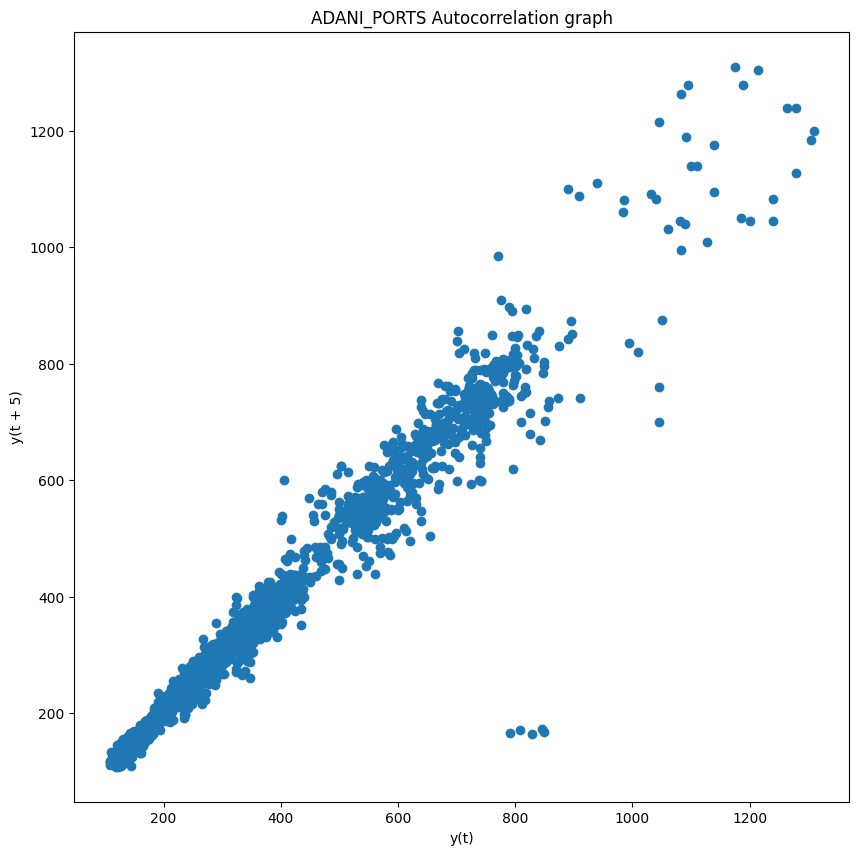

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df1['Open'], lag=5)
plt.title('ADANI_PORTS Autocorrelation graph')

            Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover         Trades  \
0     959.0  962.

,count,mean,std,min,25%,50%,75%,max
Prev Close,3322.0,3.441143e+02,1.929369e+02,1.080000e+02,1.643125e+02,3.247000e+02,4.009125e+02,1.307450e+03
Open,3322.0,3.447630e+02,1.936200e+02,1.080000e+02,1.648500e+02,3.257500e+02,4.010000e+02,1.310250e+03
High,3322.0,3.516080e+02,1.986178e+02,1.104500e+02,1.680000e+02,3.312750e+02,4.071875e+02,1.324000e+03
Low,3322.0,3.375320e+02,1.886766e+02,1.056500e+02,1.616000e+02,3.198500e+02,3.950000e+02,1.270000e+03
Last,3322.0,3.442395e+02,1.931878e+02,1.080000e+02,1.640750e+02,3.250000e+02,4.009125e+02,1.308000e+03
Close,3322.0,3.442016e+02,1.930459e+02,1.080000e+02,1.643125e+02,3.247000e+02,4.009125e+02,1.307450e+03
VWAP,3322.0,3.448532e+02,1.938413e+02,1.083400e+02,1.648550e+02,3.257650e+02,4.006075e+02,1.302150e+03
Volume,3322.0,2.954564e+06,4.104227e+06,1.236600e+04,7.493682e+05,2.007292e+06,3.636883e+06,9.771788e+07
Turnover,3322.0,1.070144e+14,2.625564e+14,2.415857e+11,1.817650e+13,5.836041e+13,1.158526e+14,8.160988e+15
Trades,3322.0,4.492259e+04,4.318821e+04,3.660000e+02,2.643650e+04,4.492259e+04,4.585475e+04,1.205984e+06


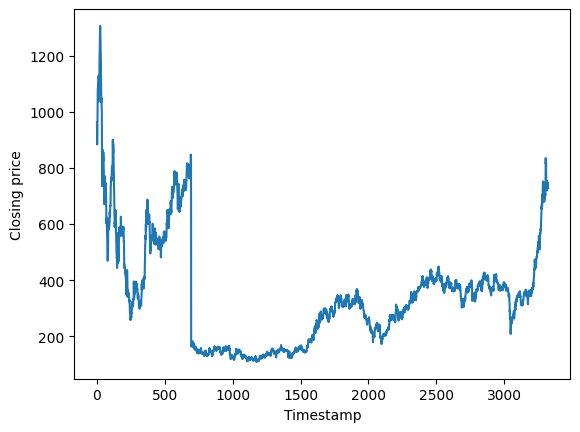

In [ ]:
plt.plot(df1['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
print(df1)

df1.describe().transpose()

**SPLITTING OF THE DATASET INTO TRAINING AND TESTING**

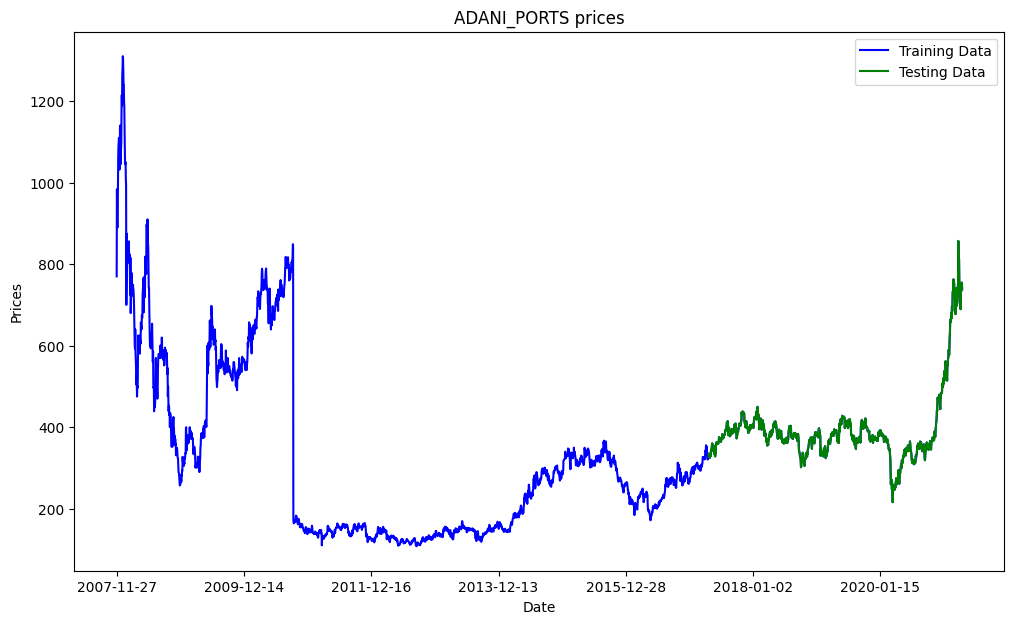

In [ ]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
plt.figure(figsize=(12,7))
plt.title('ADANI_PORTS prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df1['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,3300, 500), df1['Date'][0:3300:500])
plt.legend()

In [ ]:
print(len(train_data))
print(len(test_data))
print(len(df1))

2325
997
3322


In [ ]:
np.asarray(df1)

array([['2007-11-27', 'MUNDRAPORT', 'EQ', ..., 44922.58835504886,
        9859619, 0.3611999999999999],
       ['2007-11-28', 'MUNDRAPORT', 'EQ', ..., 44922.58835504886,
        1453278, 0.3172],
       ['2007-11-29', 'MUNDRAPORT', 'EQ', ..., 44922.58835504886,
        1069678, 0.2087999999999999],
       ...,
       ['2021-04-28', 'ADANIPORTS', 'EQ', ..., 130847.0, 1342353,
        0.1202999999999999],
       ['2021-04-29', 'ADANIPORTS', 'EQ', ..., 153293.0, 1304895, 0.0942],
       ['2021-04-30', 'ADANIPORTS', 'EQ', ..., 132141.0, 3514692, 0.2789]],
      dtype=object)

Performing ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
print(df1.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values


history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    

<class 'list'>


In [ ]:
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)

predicted=754.511544, expected=739.000000
Testing Mean Squared Error: 94.878


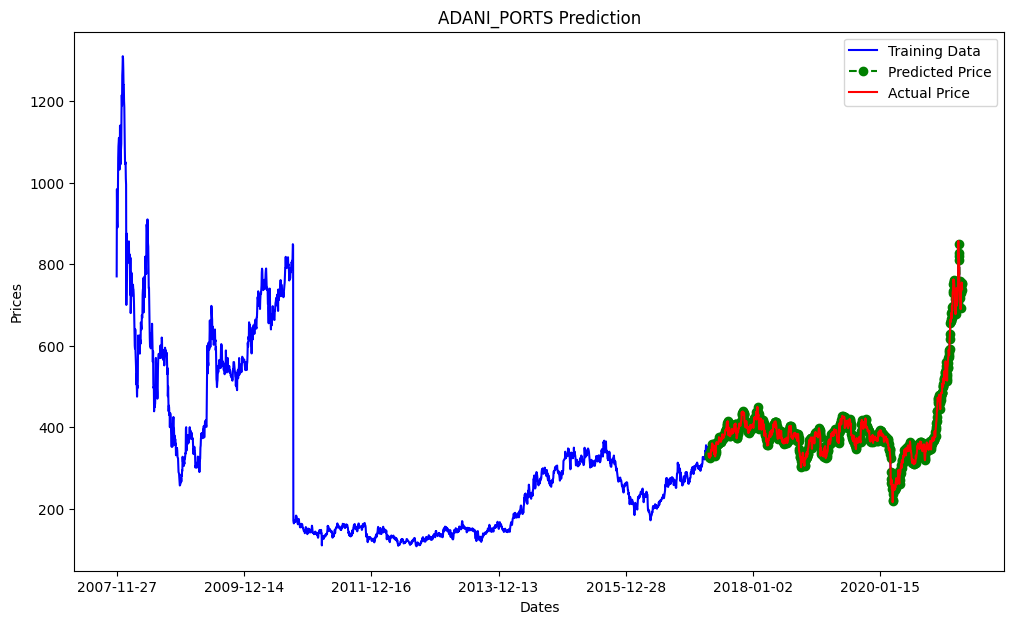

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df1['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('ADANI_PORTS Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,3200, 500), df1['Date'][0:3200:500])
plt.legend()

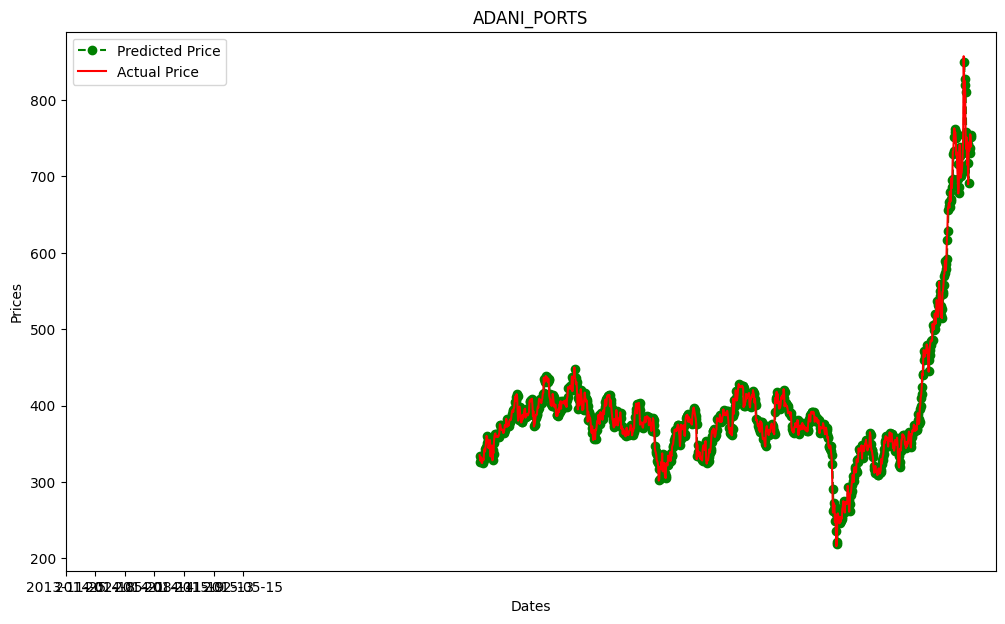

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df1['Date'][1486:1856:60])
plt.title('ADANI_PORTS')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Performing Stock Sentiment Analysis for a dataset that contains forex news as well as the historical data**

In [ ]:
link = 'https://drive.google.com/file/d/19-s2N4wkI6IVmyU_yvEg5QMN73Y0oZUo/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('AppleNews.csv') 
 
df2 = pd.read_csv('AppleNews.csv', encoding= 'unicode_escape')

In [ ]:
df2.shape

(233, 5)

In [ ]:
df2['News Headline'].isnull().sum()

0

In [ ]:
df2.head

<bound method NDFrame.head of            Date                                      News Headline  \
0      8/1/2019  Apple beats earnings expectations, driven by g...   
1     9/11/2019  Apple unveils new iPhones, Apple Watch and iPa...   
2    10/30/2019  Apple beats earnings expectations, led by stro...   
3     11/1/2019  Apple's AirPods Pro sold out within hours of l...   
4    12/17/2019  Apple to release four new iPhone models in 202...   
..          ...                                                ...   
228   4/14/2022  Apple releases iOS 15.5 update with improved p...   
229   4/15/2022  Apple launches AirPods 3 with new design and l...   
230   4/18/2022  Apple announces new iMac with M1 Pro chip and ...   
231   4/19/2022  Apple and Google cut commission on app store p...   
232   4/20/2022  Apple plans to invest $1 billion in North Caro...   

     Stock Open  Stock Close Movement  
0        213.90       208.43       -1  
1        214.84       223.59        1  
2        

In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=9419e052f866c49607efa7a6a40c5bc8e2b2b96177d14b

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
train_profile = ProfileReport(df2, title="df2")
train_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**SENTIMENT INTENSITY ANALYSZER**

In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()
df2['sentiment_score'] = df2['News Headline'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df2['sentiment_label'] = df2['sentiment_score'].apply(classify_sentiment)

In [ ]:
df2.head(3)

,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.90,208.43,-1,0.3818,positive
1,9/11/2019,"Apple unveils new iPhones, Apple Watch and iPa...",214.84,223.59,1,0.0000,neutral
2,10/30/2019,"Apple beats earnings expectations, led by stro...",247.24,243.26,-1,0.7096,positive


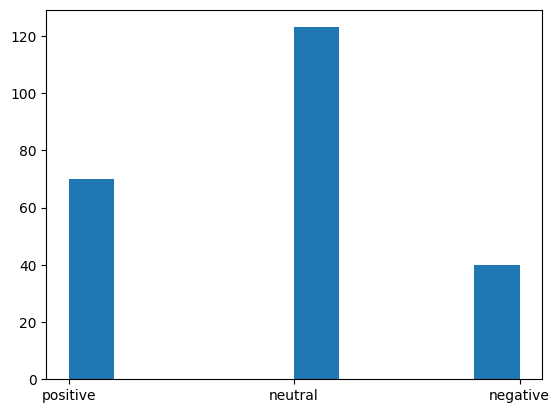

In [ ]:
plt.hist(df2['sentiment_label'])
plt.show()

**TOKENIZATION**

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
df2['News Headline_Tokenized'] = df2['News Headline'].apply(nltk.word_tokenize)


In [ ]:
df2.head

<bound method NDFrame.head of            Date                                      News Headline  \
0      8/1/2019  Apple beats earnings expectations, driven by g...   
1     9/11/2019  Apple unveils new iPhones, Apple Watch and iPa...   
2    10/30/2019  Apple beats earnings expectations, led by stro...   
3     11/1/2019  Apple's AirPods Pro sold out within hours of l...   
4    12/17/2019  Apple to release four new iPhone models in 202...   
..          ...                                                ...   
228   4/14/2022  Apple releases iOS 15.5 update with improved p...   
229   4/15/2022  Apple launches AirPods 3 with new design and l...   
230   4/18/2022  Apple announces new iMac with M1 Pro chip and ...   
231   4/19/2022  Apple and Google cut commission on app store p...   
232   4/20/2022  Apple plans to invest $1 billion in North Caro...   

     Stock Open  Stock Close Movement  \
0        213.90       208.43       -1   
1        214.84       223.59        1   
2     

**STOPWORDS ELIMINATION**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
print(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


**MANUALLY ADDING WORDS TO THE DICTIONARY**

In [ ]:
stop = list(set(stopwords.words('english')))
stopsw = stop+['plans', 'project', 'plant']

In [ ]:
print(stopsw)

["that'll", 'against', 'nor', 'theirs', 'through', 'some', 'your', "should've", 'hadn', "you'll", 'themselves', 'of', 'was', "won't", 'all', 'were', 'both', 'too', 'a', 'mightn', 'hasn', 'be', 'very', 'can', 'didn', 'further', 'their', 't', 'these', 'when', 'until', "aren't", 'isn', 'if', 'those', 'after', 'same', 'her', 'shan', 'with', "wouldn't", 'is', 'them', 'out', 'mustn', 'at', "haven't", 'whom', 'but', 'do', 'doing', 'why', 'aren', 'yourself', 'just', 'been', 'did', "couldn't", 'an', 'him', 'myself', 'who', 'am', 'off', 'each', 'she', 'up', 'how', 'below', 'such', 'our', "you're", 'you', 'so', "weren't", 'there', 'don', 're', "wasn't", 'while', 'under', "hadn't", 'haven', 'ourselves', 'he', 'before', "isn't", 'then', 'its', 'we', 'himself', 'most', 'now', "didn't", 'ours', 'will', 'from', 'in', 'd', "needn't", "doesn't", 'above', 'having', 'down', 'does', 'more', 'which', 'during', 'i', 'because', 'where', 'over', 'm', "shouldn't", 'me', 'ain', 'ma', 'that', "you'd", 'wasn', 'as

In [ ]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in stopsw:
            result.append(token)
            
    return result
df2['StopWords'] = df2['News Headline_Tokenized'].apply(remove_stopwords)
df2.head(1)

,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label,News Headline_Tokenized,StopWords
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.9,208.43,-1,0.3818,positive,"[Apple, beats, earnings, expectations, ,, driv...","[Apple, beats, earnings, expectations, ,, driv..."


**LEMMATIZATION**

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()    
    result=[]
    for word in text:
        result.append(lemmatizer.lemmatize(word))
    return result

df2['Lem'] = df2['StopWords'].apply(lemmatizing)
df2.head(1)


,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label,News Headline_Tokenized,StopWords,Lem
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.9,208.43,-1,0.3818,positive,"[Apple, beats, earnings, expectations, ,, driv...","[Apple, beats, earnings, expectations, ,, driv...","[Apple, beat, earnings, expectation, ,, driven..."


**STEMMING**

In [ ]:
from nltk.stem import PorterStemmer
def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result

df2['Stemmed'] = df2['Lem'].apply(stemming)
df2.head(1)

,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label,News Headline_Tokenized,StopWords,Lem,Stemmed
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.9,208.43,-1,0.3818,positive,"[Apple, beats, earnings, expectations, ,, driv...","[Apple, beats, earnings, expectations, ,, driv...","[Apple, beat, earnings, expectation, ,, driven...","[appl, beat, earn, expect, ,, driven, growth, ..."


**COUNTING FREQUENTLY OCCURING WORDS**

In [ ]:
from collections import Counter
cnt = Counter()
for text in df2["News Headline"].values:
    for word in str(text).split():
        cnt[word] += 1
cnt.most_common(20)
text1 = pd.DataFrame(cnt.most_common(20))
text1.columns=['Word', 'Frequency']
text1

,Word,Frequency
0,Apple,218
1,to,76
2,with,52
3,in,51
4,new,49
5,and,35
6,for,35
7,of,31
8,New,31
9,iPhone,29


In [ ]:
import plotly.express as px

In [ ]:
px.bar(text1, x="Frequency", y="Word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [ ]:
FREQUENTWORDS = set([w for (w, wc) in cnt.most_common(4)])
def remove_freqwords(text):
    words = str(text).split()
    words_to_keep = []
    for i, word in enumerate(words):
        if i == 0:
            words_to_keep.append(word)
        elif word not in FREQUENTWORDS: 
            words_to_keep.append(word)
    return " ".join(words_to_keep)
df2["Clean News Headline"] = df2["Stemmed"].apply(lambda text: remove_freqwords(text))
df2.head(1)

,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label,News Headline_Tokenized,StopWords,Lem,Stemmed,Clean News Headline
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.9,208.43,-1,0.3818,positive,"[Apple, beats, earnings, expectations, ,, driv...","[Apple, beats, earnings, expectations, ,, driv...","[Apple, beat, earnings, expectation, ,, driven...","[appl, beat, earn, expect, ,, driven, growth, ...","['appl', 'beat', 'earn', 'expect', ',', 'drive..."


In [ ]:
df2.head(1)

,Date,News Headline,Stock Open,Stock Close,Movement,sentiment_score,sentiment_label,News Headline_Tokenized,StopWords,Lem,Stemmed,Clean News Headline
0,8/1/2019,"Apple beats earnings expectations, driven by g...",213.9,208.43,-1,0.3818,positive,"[Apple, beats, earnings, expectations, ,, driv...","[Apple, beats, earnings, expectations, ,, driv...","[Apple, beat, earnings, expectation, ,, driven...","[appl, beat, earn, expect, ,, driven, growth, ...","['appl', 'beat', 'earn', 'expect', ',', 'drive..."


**IMPLEMENTATION OF BAG OF WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features= 20)
X = vectorizer.fit_transform(df2['Clean News Headline']).toarray()
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 10)
Y1 = vectorizer.fit_transform(df2['Clean News Headline']).toarray()
Y1


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4931957 , ..., 0.50260416, 0.        ,
        0.        ],
       [0.        , 0.        , 0.32808123, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61179127, 0.        , 0.22086522, ..., 0.45015712, 0.        ,
        0.        ],
       [0.        , 0.69812451, 0.21942637, ..., 0.        , 0.        ,
        0.68152346],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

**WORDCLOUD**

WORDCLOUD FOR BAG OF WORDS

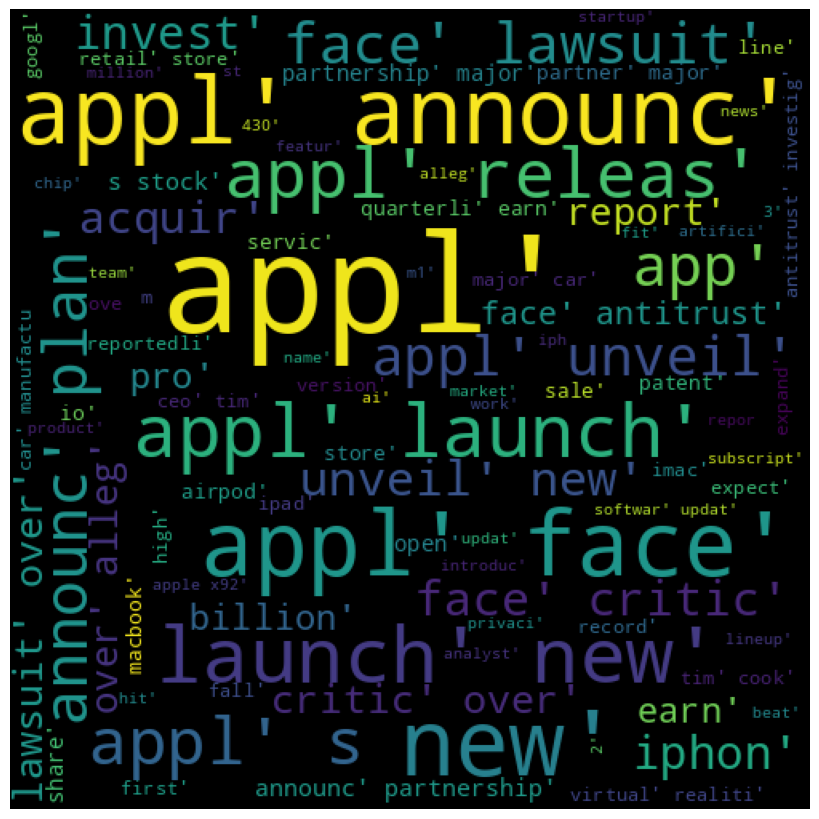

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = df2['Clean News Headline']

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(data.to_string())

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

WORDCLOUD FOR TF-IDF

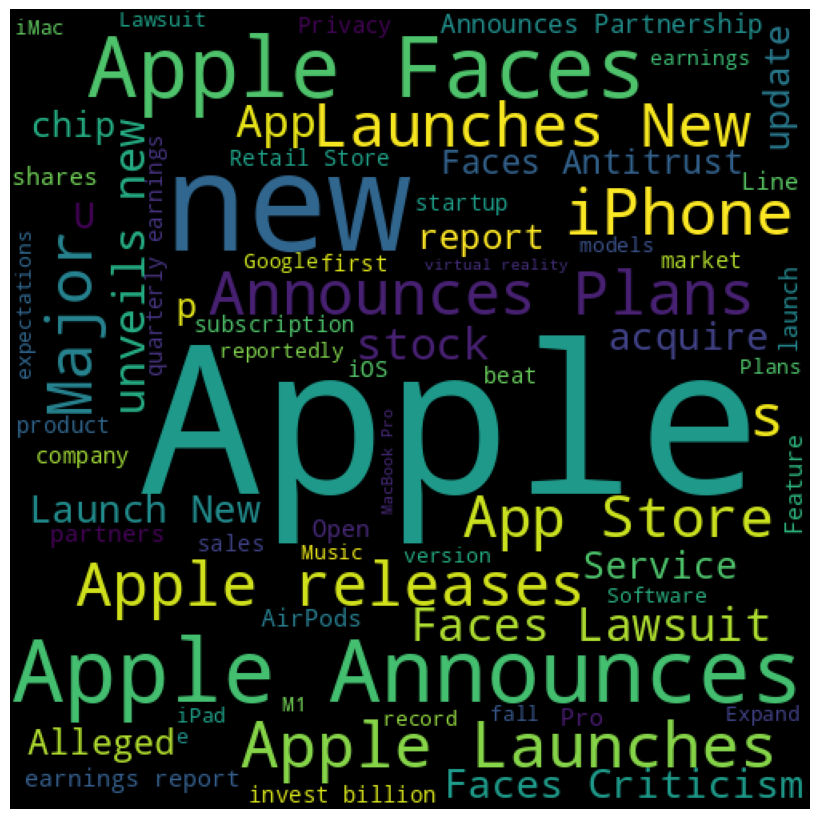

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data1 = df2['News Headline']

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(data1.to_string())

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**POS TAGGING**

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
data2 = data

In [ ]:
corpusPOS = []

In [ ]:
for doc in data2:
    tokens = nltk.word_tokenize(doc)
    pos_tags = nltk.pos_tag(tokens)
    corpusPOS.append(pos_tags)

# Print the POS tagged corpus
print(corpusPOS)

[[('[', 'JJ'), ("'appl", 'NNP'), ("'", 'POS'), (',', ','), ("'beat", 'NNP'), ("'", 'POS'), (',', ','), ("'earn", 'NNP'), ("'", 'POS'), (',', ','), ("'expect", 'NNP'), ("'", 'POS'), (',', ','), ("'", "''"), (',', ','), ("'", "''"), (',', ','), ("'driven", "''"), ("'", "''"), (',', ','), ("'growth", 'NNP'), ("'", 'POS'), (',', ','), ("'servic", 'NNP'), ("'", 'POS'), (',', ','), ("'segment", 'NNP'), ("'", 'POS'), (']', 'NN')], [('[', 'JJ'), ("'appl", 'NNP'), ("'", 'POS'), (',', ','), ("'unveil", 'NNP'), ("'", 'POS'), (',', ','), ("'new", 'NNP'), ("'", 'POS'), (',', ','), ("'iphon", 'NNP'), ("'", 'POS'), (',', ','), ("'", "''"), (',', ','), ("'", "''"), (',', ','), ("'appl", 'NNP'), ("'", 'POS'), (',', ','), ("'watch", "''"), ("'", "''"), (',', ','), ("'ipad", 'NNP'), ("'", 'POS'), (',', ','), ("'annual", 'JJ'), ("'", "''"), (',', ','), ("'event", 'NNP'), ("'", 'POS'), (']', 'NN')], [('[', 'JJ'), ("'appl", 'NNP'), ("'", 'POS'), (',', ','), ("'beat", 'NNP'), ("'", 'POS'), (',', ','), ("'ear

**SPLITTING INTO TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
YW = df2['Stock Close']



**APPLYING RANDOM FOREST ON BAG OF WORDS & TF-IDF VECTORIZATION TECHNIQUES**



For BAG OF WORDS

In [ ]:
XW_train, XW_test, YW_train, YW_test = train_test_split(X, YW, test_size=0.35, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(XW_train, YW_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred1 = reg.predict(XW_test)
mse = mean_squared_error(YW_test, y_pred1)
r2 = r2_score(YW_test, y_pred1)
print("Mean squared error: %.2f" % mse)
print("R2 score: %.2f" % r2)

Mean squared error: 4047.89
R2 score: -0.13


For TF-IDF

In [ ]:
XV_train, XV_test, YV_train, YV_test = train_test_split(Y1, YW, test_size=0.35, random_state=42)

In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(XV_train, YV_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred2 = reg.predict(XV_test)
mse = mean_squared_error(YV_test, y_pred2)
r2 = r2_score(YV_test, y_pred2)
print("Mean squared error: %.2f" % mse)
print("R2 score: %.2f" % r2)

Mean squared error: 3889.78
R2 score: -0.09


**APPLYING LINEAR REGRESSION**

WITH THE HELP OF BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, YW, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred3 = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse)

Mean Squared Error: 3796.672318637426


Manually seeing the value of the price with BOW

In [ ]:
new_text_data = ["Apple CEO TIm Cook to invest in some tech company"]
new_text_features = vectorizer.transform(new_text_data).toarray()

In [ ]:
print("Number of features in new text data:", new_text_features.shape[1])
print("Number of features used to train model:", Y1.shape[1])

Number of features in new text data: 10
Number of features used to train model: 10


In [ ]:
if new_text_features.shape[1] < X_train.shape[1]:
    new_text_features = np.concatenate((new_text_features, np.zeros((new_text_features.shape[0], X_train.shape[1] - new_text_features.shape[1]))), axis=1)
new_price_prediction = model.predict(new_text_features)
print("New price prediction:", new_price_prediction)

New price prediction: [225.5471798]


WITH THE HELP OF TF-IDF

In [ ]:
XA_train, XA_test, YA_train, YA_test = train_test_split(Y1, YW, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(XA_train, YA_train)

LinearRegression()

In [ ]:
y_pred4 = model.predict(XA_test)
mse = mean_squared_error(YA_test, y_pred4)
print("Mean Squared Error:", mse)

Mean Squared Error: 2243.8674020641843


Manually seeing the value of the price with TF-IDF

In [ ]:
new_text_data = ["Apple CEO TIm Cook to invest in some tech company"]
new_text_features = vectorizer.transform(new_text_data).toarray()

In [ ]:
if new_text_features.shape[1] < XA_train.shape[1]:
    new_text_features = np.concatenate((new_text_features, np.zeros((new_text_features.shape[0], XA_train.shape[1] - new_text_features.shape[1]))), axis=1)
new_price_prediction = model.predict(new_text_features)
print("New price prediction:", new_price_prediction)

New price prediction: [216.34131912]


**TF-IDF when implemented with Linear Regression is giving more significant results than the other models. The Mean square error provided by this model is 2243.87**

**Stock Price Prediction using NLP (Historical + News Data) of Apple Companyt**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
# Load the stock dataset
stock_data = pd.read_csv('/content/ApplestockData.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close
0,12/1/2006,13.1143,13.1900,12.8714,91.32,13.0457
1,12/4/2006,13.1257,13.1500,12.9286,91.12,13.0171
2,12/5/2006,13.0929,13.1900,12.9814,91.27,13.0386
3,12/6/2006,12.9486,13.0557,12.8100,89.83,12.8329
4,12/7/2006,12.8614,12.9286,12.4143,87.04,12.4343


In [3]:
# Load the news dataset
news_data = pd.read_csv('/content/apple_news.csv')
news_data.head()

,Date,News
0,12/1/2006,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,12/4/2006,More on Housing Prices : The broadest governme...
2,12/5/2006,NaN
3,12/6/2006,Honoring R.W. Apple in Words and Food : About ...
4,12/7/2006,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [4]:
# Preprocess the stock data
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Preprocess the news data
news_data['Date'] = pd.to_datetime(news_data['Date'])
news_data.set_index('Date', inplace=True)

In [5]:
# Merge stock and news data on the date column
merged_data = pd.merge(stock_data, news_data, on='Date', how='inner')

In [6]:
# Split the data into training and testing sets
X = merged_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'News']]
y = merged_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[['Open', 'High', 'Low', 'Close', 'Adj Close']])
X_test_scaled = scaler.transform(X_test[['Open', 'High', 'Low', 'Close', 'Adj Close']])

In [8]:
# Vectorize the news data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_news = vectorizer.fit_transform(X_train['News'].values.astype('U'))
X_test_news = vectorizer.transform(X_test['News'].values.astype('U'))

In [9]:
# Combine the scaled numerical features and vectorized news data
X_train_final = np.concatenate((X_train_scaled, X_train_news.toarray()), axis=1)
X_test_final = np.concatenate((X_test_scaled, X_test_news.toarray()), axis=1)


In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [11]:
# Predict on the test set
y_pred = model.predict(X_test_final)

In [12]:
# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6.482584699211457


In [13]:
# Predict on new data
new_data = pd.DataFrame({
    'Date': ['2023-05-22'],
    'Open': [250.0],
    'High': [255.0],
    'Low': [245.0],
    'Close': [250.0],
    'Adj Close': [250.0],
    'News': ['Some positive news about the company']
})

In [14]:
new_data.head()

,Date,Open,High,Low,Close,Adj Close,News
0,2023-05-22,250.0,255.0,245.0,250.0,250.0,Some positive news about the company


In [15]:
# Preprocess the new data
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data.set_index('Date', inplace=True)

In [16]:
# Scale the numerical features of the new data
new_data_scaled = scaler.transform(new_data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Vectorize the news data of the new data
new_data_news = vectorizer.transform(new_data['News'].values.astype('U'))

In [17]:
new_data_final = np.concatenate((new_data_scaled, new_data_news.toarray()), axis=1)

In [18]:
# Predict on new data
predicted_price = model.predict(new_data_final)

In [19]:
# Retrieve the actual stock price
actual_price = new_data['Close'].values[0]

In [20]:
print('Actual Close Stock Price:', actual_price)
print('Predicted Close Stock Price:', predicted_price[0])

Actual Close Stock Price: 250.0
Predicted Close Stock Price: 255.59116348753153


The model achieved a Root Mean Squared Error (RMSE) of 6.482584699211457 on the test set, indicating a moderate level of prediction error. The actual and predicted stock prices were printed.